Estimted no. of clusters: 3
Estimted no. of noise point: 2


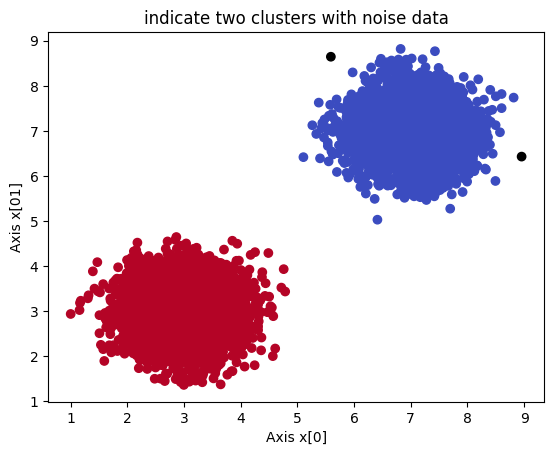

In [ ]:
from sklearn.datasets import make_blobs             
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt


#data generation
num_samples_total= 10000            
cluster_center=[(3,3),(7,7)]          
num_classes=len(cluster_center)         


#dbscan configs
epsilon=0.5                             
min_samples=20

#generate data
x,y=make_blobs(n_samples= num_samples_total,centers=cluster_center,n_features=num_classes,center_box=(0,1),cluster_std=0.5)

# np.save("./clusters.npy",x)
# x=np.load("./clusters.npy")

#compute DBSCAN
db=DBSCAN(eps=epsilon,min_samples=min_samples).fit(x)
labels=db.labels_                                          




#get the number of clusters and outliers founded
no_clusters=len(np.unique(labels))                              
no_noise=np.sum(np.array(labels)== -1,axis=0)                   
print("Estimted no. of clusters: %d" % no_clusters)
print("Estimted no. of noise point: %d" % no_noise)


#Generate scatter plot for training data
colors=list(map(lambda x:'#3b4cc0' if x==0 else ('#b40426' if x==1 else '#000000'),labels)) 
plt.scatter(x[:,0],x[:,1],c=colors,marker="o",picker=True)                                              
plt.title("indicate two clusters with noise data")             
plt.xlabel("Axis x[0]")                                         
plt.ylabel("Axis x[01]")
plt.show()

Removing noise from the dataset after clustering

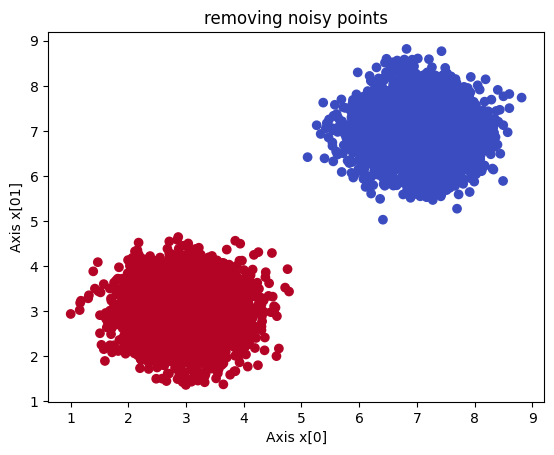

In [23]:
#Remove the noise
range_max=len(x)
x=np.array([x[i] for i in range(0,range_max) if labels[i] != -1])
labels=np.array([labels[i] for i in range(0,range_max) if labels[i]!= -1])

#generate scatter plot for trianing data
colors=list(map(lambda x:'#3b4cc0' if x==0 else '#b40426',labels))

plt.scatter(x[:,0] , x[:,1] , c=colors , marker="o" ,picker=True)              
plt.title(f"removing noisy points")             
plt.xlabel("Axis x[0]")                                      
plt.ylabel("Axis x[01]")
plt.show()